In [1]:
from keras.datasets import cifar10
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [5]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


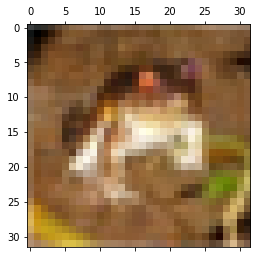

In [6]:
plt.matshow(X_train[0])
print(y_train[0])

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D,Activation

In [8]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:],activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(96,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [10]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=128,epochs = 10,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 316us/step - loss: 1.7121 - accuracy: 0.3534 - val_loss: 1.3891 - val_accuracy: 0.4947
Epoch 2/10
50000/50000 [==============================] - 14s 283us/step - loss: 1.3155 - accuracy: 0.5202 - val_loss: 1.1454 - val_accuracy: 0.5841
Epoch 3/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.1492 - accuracy: 0.5908 - val_loss: 1.1129 - val_accuracy: 0.5953
Epoch 4/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.0142 - accuracy: 0.6416 - val_loss: 0.9075 - val_accuracy: 0.6752
Epoch 5/10
50000/50000 [==============================] - 14s 285us/step - loss: 0.9070 - accuracy: 0.6804 - val_loss: 0.8268 - val_accuracy: 0.7138
Epoch 6/10
50000/50000 [==============================] - 14s 280us/step - loss: 0.8278 - accuracy: 0.7089 - val_loss: 0.7612 - val_accuracy: 0.7340
Epoch 7/10
50000/50000 [==============================] 

In [11]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 181us/step


[0.7057786311149598, 0.7590000033378601]

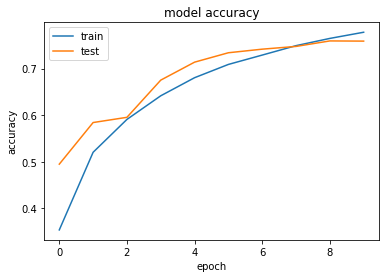

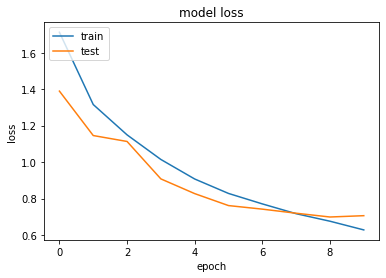

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()